Лабораторная работа №3
Курьянов Александр Игоревич
Группа: РТ5-61Б
    
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
1 - обработку пропусков в данных;
2 - кодирование категориальных признаков;
3 - масштабирование данных.

Датасет: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [5]:
data = pd.read_csv('data/dc-wikia-data.csv', sep=",")

In [6]:
data.shape

(6896, 13)

In [7]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [8]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [10]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6896


1 Обработка пропусков в данных

In [11]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6896, 13), (6896, 3))

In [12]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6896, 13), (38, 13))

In [13]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [14]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,0,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,1237.0,"1940, April",1940.0


In [15]:

# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355, 5.15%.
Колонка YEAR. Тип данных float64. Количество пустых значений 69, 1.0%.


In [16]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,APPEARANCES,YEAR
0,3093.0,1939.0
1,2496.0,1986.0
2,1565.0,1959.0
3,1316.0,1987.0
4,1237.0,1940.0
...,...,...
6891,NaN,NaN
6892,NaN,NaN
6893,NaN,NaN
6894,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


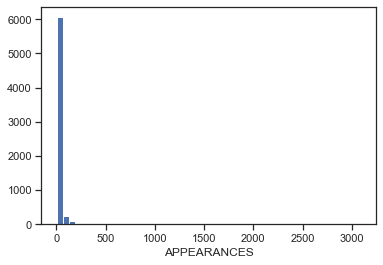

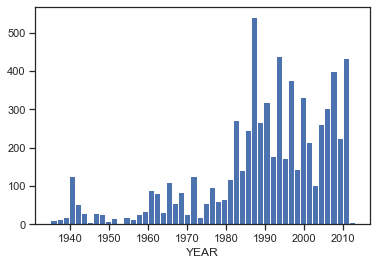

In [17]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [18]:
# Фильтр по пустым значениям поля APPEARANCES
data[data['APPEARANCES'].isnull()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6541,306472,Matteo Bischoff (New Earth),\/wiki\/Matteo_Bischoff_(New_Earth),Secret Identity,Bad Characters,NaN,Grey Hair,Male Characters,NaN,Living Characters,NaN,"2012, May",2012.0
6542,273317,Doomslayer (New Earth),\/wiki\/Doomslayer_(New_Earth),Secret Identity,Bad Characters,Green Eyes,White Hair,Male Characters,NaN,Living Characters,NaN,"2011, July",2011.0
6543,242097,Emily Sung (New Earth),\/wiki\/Emily_Sung_(New_Earth),Secret Identity,Good Characters,Violet Eyes,Purple Hair,Female Characters,NaN,Living Characters,NaN,"2011, July",2011.0
6544,247494,Ry'jll (New Earth),\/wiki\/Ry%27jll_(New_Earth),Secret Identity,Good Characters,Green Eyes,NaN,Female Characters,NaN,Living Characters,NaN,"2011, October",2011.0
6545,161599,Baron Gestapo (New Earth),\/wiki\/Baron_Gestapo_(New_Earth),NaN,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"2010, March",2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [19]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['APPEARANCES'].isnull()].index
flt_index

Int64Index([6541, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550,
            ...
            6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895],
           dtype='int64', length=355)

In [20]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6541,306472,Matteo Bischoff (New Earth),\/wiki\/Matteo_Bischoff_(New_Earth),Secret Identity,Bad Characters,NaN,Grey Hair,Male Characters,NaN,Living Characters,NaN,"2012, May",2012.0
6542,273317,Doomslayer (New Earth),\/wiki\/Doomslayer_(New_Earth),Secret Identity,Bad Characters,Green Eyes,White Hair,Male Characters,NaN,Living Characters,NaN,"2011, July",2011.0
6543,242097,Emily Sung (New Earth),\/wiki\/Emily_Sung_(New_Earth),Secret Identity,Good Characters,Violet Eyes,Purple Hair,Female Characters,NaN,Living Characters,NaN,"2011, July",2011.0
6544,247494,Ry'jll (New Earth),\/wiki\/Ry%27jll_(New_Earth),Secret Identity,Good Characters,Green Eyes,NaN,Female Characters,NaN,Living Characters,NaN,"2011, October",2011.0
6545,161599,Baron Gestapo (New Earth),\/wiki\/Baron_Gestapo_(New_Earth),NaN,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"2010, March",2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [21]:

# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['APPEARANCES']

6541   NaN
6542   NaN
6543   NaN
6544   NaN
6545   NaN
        ..
6891   NaN
6892   NaN
6893   NaN
6894   NaN
6895   NaN
Name: APPEARANCES, Length: 355, dtype: float64

In [22]:
data_num_MasVnrArea = data_num[['APPEARANCES']]
data_num_MasVnrArea.head()

,APPEARANCES
0,3093.0
1,2496.0
2,1565.0
3,1316.0
4,1237.0


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [24]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [28]:
strategies=['mean', 'median','most_frequent']

In [29]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [30]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513377, 23.62513377, 23.62513377,
        23.62513377, 23.62513377, 23.62513

In [31]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
 

In [32]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [33]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [35]:
data[['APPEARANCES']].describe()

,APPEARANCES
count,6541.000000
mean,23.625134
std,87.378509
min,1.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,3093.000000


In [36]:
test_num_impute_col(data, 'APPEARANCES', strategies[0])

('APPEARANCES', 'mean', 355, 23.62513377159456, 23.62513377159456)

In [37]:
test_num_impute_col(data, 'APPEARANCES', strategies[1])

('APPEARANCES', 'median', 355, 6.0, 6.0)

In [38]:
test_num_impute_col(data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', 355, 1.0, 1.0)

In [39]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


In [40]:
cat_temp_data = data[['APPEARANCES']]
cat_temp_data.head()

,APPEARANCES
0,3093.0
1,2496.0
2,1565.0
3,1316.0
4,1237.0


In [41]:
cat_temp_data['APPEARANCES'].unique()

array([3.093e+03, 2.496e+03, 1.565e+03, 1.316e+03, 1.237e+03, 1.231e+03,
       1.121e+03, 1.095e+03, 1.075e+03, 1.028e+03, 9.690e+02, 9.510e+02,
       9.340e+02, 9.300e+02, 8.030e+02, 7.160e+02, 7.060e+02, 6.770e+02,
       6.540e+02, 6.350e+02, 6.050e+02, 5.950e+02, 5.930e+02, 5.840e+02,
       5.600e+02, 5.580e+02, 5.570e+02, 5.490e+02, 5.170e+02, 4.920e+02,
       4.870e+02, 4.700e+02, 4.390e+02, 4.360e+02, 4.290e+02, 4.270e+02,
       4.230e+02, 4.220e+02, 4.130e+02, 3.990e+02, 3.930e+02, 3.910e+02,
       3.880e+02, 3.860e+02, 3.740e+02, 3.710e+02, 3.700e+02, 3.610e+02,
       3.560e+02, 3.530e+02, 3.500e+02, 3.450e+02, 3.440e+02, 3.360e+02,
       3.350e+02, 3.250e+02, 3.210e+02, 3.190e+02, 3.140e+02, 3.110e+02,
       3.090e+02, 3.080e+02, 3.060e+02, 3.050e+02, 3.010e+02, 3.000e+02,
       2.990e+02, 2.970e+02, 2.910e+02, 2.880e+02, 2.860e+02, 2.840e+02,
       2.820e+02, 2.680e+02, 2.660e+02, 2.620e+02, 2.610e+02, 2.560e+02,
       2.540e+02, 2.530e+02, 2.520e+02, 2.500e+02, 

In [42]:
cat_temp_data[cat_temp_data['APPEARANCES'].isnull()].shape

(355, 1)

In [43]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([[3.093e+03],
       [2.496e+03],
       [1.565e+03],
       ...,
       [1.000e+00],
       [1.000e+00],
       [1.000e+00]])

In [44]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array([1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 1.200e+01,
       1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01, 1.800e+01,
       1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01, 2.400e+01,
       2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01, 3.000e+01,
       3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01,
       3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01,
       4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01,
       4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01,
       5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01,
       6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01,
       6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01, 7.200e+01,
       7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01, 7.800e+01,
       7.900e+01, 8.000e+01, 8.100e+01, 8.200e+01, 

2 Преобразование категориальных признаков в числовые

In [46]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc


,c1
0,3093.0
1,2496.0
2,1565.0
3,1316.0
4,1237.0
...,...
6891,1.0
6892,1.0
6893,1.0
6894,1.0


In [47]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [49]:
cat_enc['c1'].unique()

array([3.093e+03, 2.496e+03, 1.565e+03, 1.316e+03, 1.237e+03, 1.231e+03,
       1.121e+03, 1.095e+03, 1.075e+03, 1.028e+03, 9.690e+02, 9.510e+02,
       9.340e+02, 9.300e+02, 8.030e+02, 7.160e+02, 7.060e+02, 6.770e+02,
       6.540e+02, 6.350e+02, 6.050e+02, 5.950e+02, 5.930e+02, 5.840e+02,
       5.600e+02, 5.580e+02, 5.570e+02, 5.490e+02, 5.170e+02, 4.920e+02,
       4.870e+02, 4.700e+02, 4.390e+02, 4.360e+02, 4.290e+02, 4.270e+02,
       4.230e+02, 4.220e+02, 4.130e+02, 3.990e+02, 3.930e+02, 3.910e+02,
       3.880e+02, 3.860e+02, 3.740e+02, 3.710e+02, 3.700e+02, 3.610e+02,
       3.560e+02, 3.530e+02, 3.500e+02, 3.450e+02, 3.440e+02, 3.360e+02,
       3.350e+02, 3.250e+02, 3.210e+02, 3.190e+02, 3.140e+02, 3.110e+02,
       3.090e+02, 3.080e+02, 3.060e+02, 3.050e+02, 3.010e+02, 3.000e+02,
       2.990e+02, 2.970e+02, 2.910e+02, 2.880e+02, 2.860e+02, 2.840e+02,
       2.820e+02, 2.680e+02, 2.660e+02, 2.620e+02, 2.610e+02, 2.560e+02,
       2.540e+02, 2.530e+02, 2.520e+02, 2.500e+02, 

In [50]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [51]:
le.inverse_transform([0, 1, 2, 3])

array([1., 2., 3., 4.])

In [52]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [53]:
cat_enc.shape

(6896, 1)

In [54]:
cat_enc_ohe

<6896x282 sparse matrix of type '<class 'numpy.float64'>'
	with 6896 stored elements in Compressed Sparse Row format>

In [55]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
cat_enc.head(10)

,c1
0,3093.0
1,2496.0
2,1565.0
3,1316.0
4,1237.0
5,1231.0
6,1121.0
7,1095.0
8,1075.0
9,1028.0


In [57]:
pd.get_dummies(cat_enc).head()

,c1
0,3093.0
1,2496.0
2,1565.0
3,1316.0
4,1237.0


In [58]:

pd.get_dummies(cat_temp_data, dummy_na=True).head()

,APPEARANCES
0,3093.0
1,2496.0
2,1565.0
3,1316.0
4,1237.0


3 - Масштабирование данных

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [61]:

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


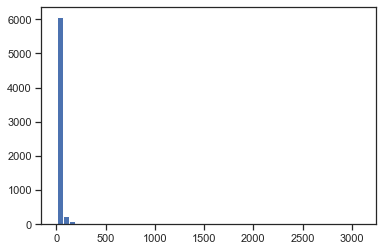

In [62]:
plt.hist(data['APPEARANCES'], 50)
plt.show()

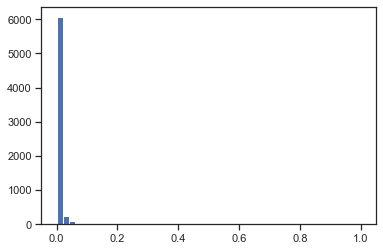

In [63]:
plt.hist(sc1_data, 50)
plt.show()

In [65]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['APPEARANCES']])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


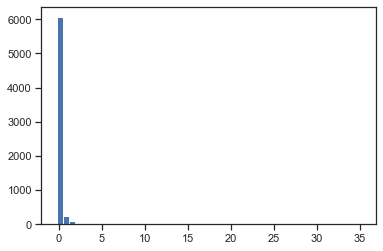

In [66]:
plt.hist(sc2_data, 50)
plt.show()